Title

This is the 2nd tutorial notebook, following the 1st one: `Introductory_tutorial_(1)`. <br/>
This tutorial aims to explain you how to use the functions made for analysis **at the issue level**.

Analysis at the issue level has been focused on issue frequency through time, and access right statistics (license type).

If you do not understand some parts of the notebook, in particular for any part regarding loading datasets, transformation of tables etc, please refer to the first  tutorial notebook 1 : `Introductory_tutorial_(1)`.

In [1]:
%load_ext autoreload
%autoreload 2

## Setup

In [2]:
# Specify path for imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

#### Plotting setup
For better rendering, we recommand importing seaborn and using a grid (white or dark, depending on your preference).

In [26]:
import seaborn as sns
sns.set(style="darkgrid")
#sns.set(style="whitegrid")

## 1. Issue frequency

The main function regarding issue frequency is `plt_freq_issues_time`. <br/>
It computes the number of issues by newspaper by year (or by decade, depending on parameter `time_gran`), and displays it on a plot. The result of the operation (a pandas dataframe) is also returned. 

You can pass the function several **filters** (see tutorial (1)), about years, newspapers, country, properties. It will call the function `filter_df`, presented in the 1st tutorial.

This function is "all in one". What we mean by that is that it does all for you : 
- loading the sql issues table as a pandas dataframe,
- adding the necessary columns (e.g. decade), 
- grouping by and counting

You only need to specify one parameter : `time_gran`, which can be either `'year'` or `'decade'`, depending on how precise ou want the frenquency statistic to be.

In [6]:
from impresso_stats.visualization import plt_freq_issues_time

### 1.1 Naive example
Let's first call the function in the simplest way, to give you an idea on what it does. The minimum you have to specify is the "time granularity", i.e. `'year'` or `'decade'`.

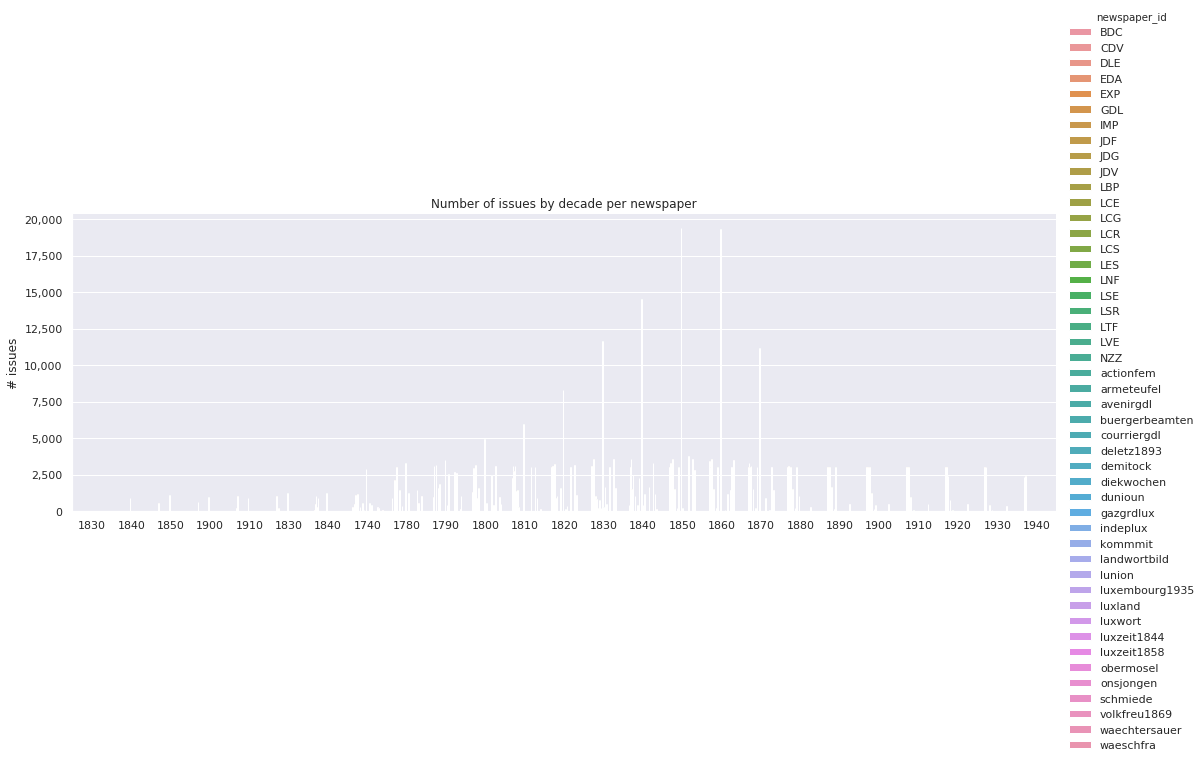

In [45]:
df = plt_freq_issues_time('decade')

##### Snapshot of the returned dataframe

In [46]:
df.head()

,newspaper_id,decade,count
0,BDC,1830,23
1,CDV,1840,304
2,CDV,1850,896
3,DLE,1900,4
4,DLE,1910,398


##### Explanation
As there is a lot of newspapers (and also a lot of decades), this plot shows nothing: we can't see the colors. <br/>You have two options to make it more readable : **plot by batch** or **filter** (or both !). 

The two options and explained below.

##### Remark
As said above, the function does all for you, but each time you call it it reloads the table, adds the decade columns etc. If you are going to try several visualization (as we will do now), we recommend that you load the table as a pandas dataframe yourself, and do all necessary preprocessing ourself once, and then **pass the final dataframe as parameter to the function**. It will be computationnally lighter (and thus faster).

### 1.2 Loading data
If any part of this section seem unclear, please refer to the 1st tutorial notebook `Introductory_tutorial_(1).ipynb`.

In [34]:
from impresso_stats.sql import db_engine, read_table
from impresso_stats.helpers import decade_from_year_df

In [28]:
engine = db_engine()
issues_df = read_table('impresso.issues', engine)

In [35]:
issues_df = decade_from_year_df(issues_df)

##### Calling the function with a dataframe
Now that you have loaded the dataframe, you would call the function the same way as before, but with a new parameter.

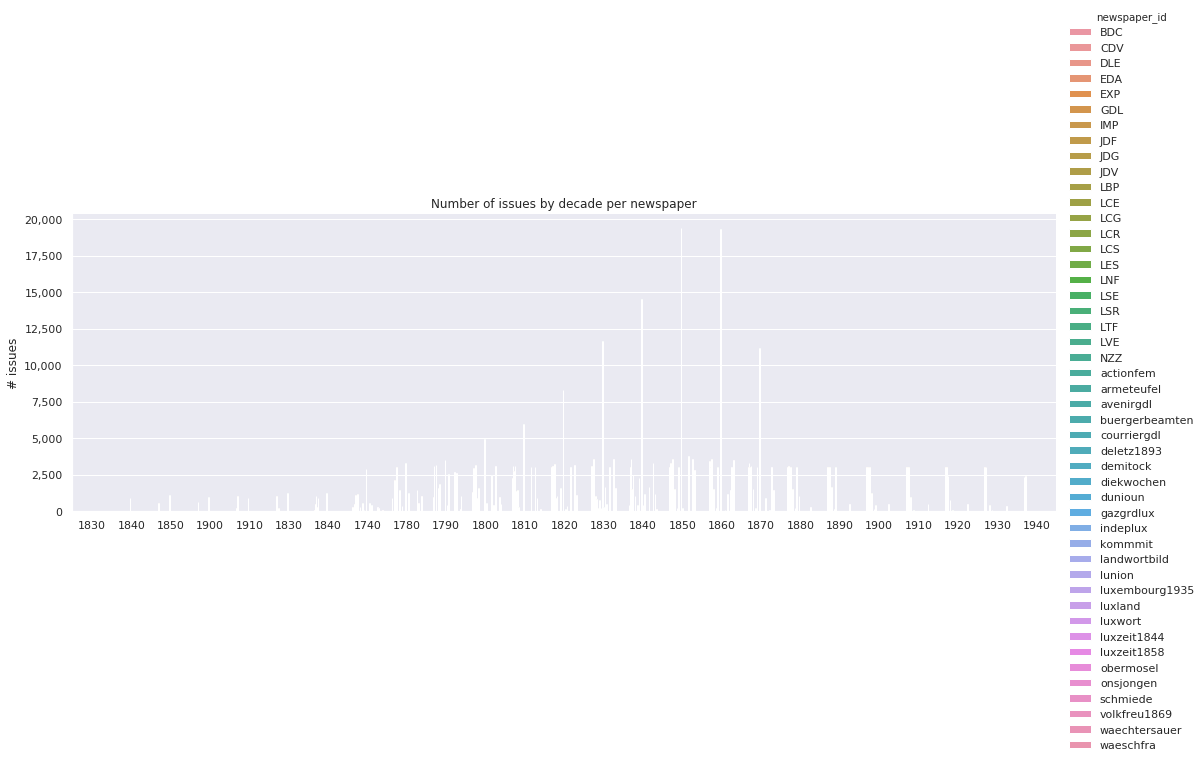

In [48]:
# This does exactly the same as above.
df = plt_freq_issues_time('decade', issues_df)

### 1.3 Filtering
You can apply any kind of filter, as shown in tutorial (1).

Let's see some examples.

#### 1.3.1 Specify newspapers
Let's say you would like to know the number of issues published for two specific newspapers (on the same plot) : *La gazette de Lausanne (GDL)* and *Le Journal de Genève (JDG)*, for each year.

##### Remark
*As you only have two newspapers here, it is fine to plot by year, but if you have more and the newspapers have issues over a lot of years, if may not render well. You may have to chose specific years, or plot by decade.*

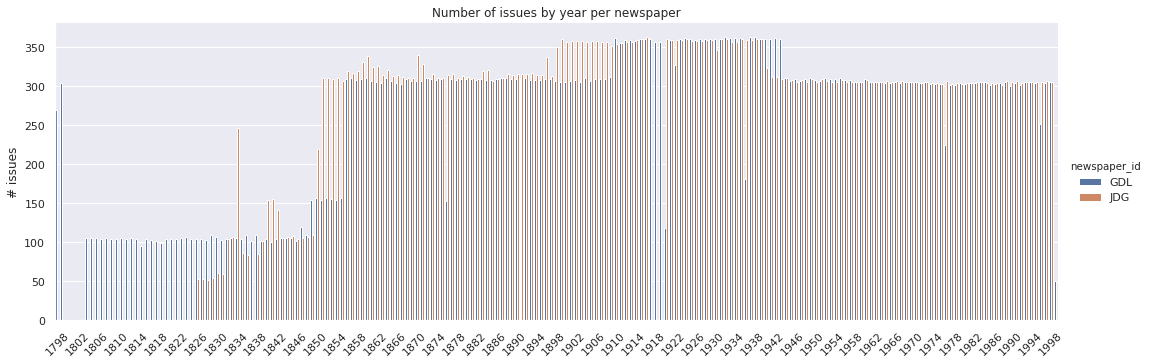

In [198]:
df = plt_freq_issues_time('year', np_ids=['JDG', 'GDL'], df=issues_df)

##### Explanation
As there are issues for a lot of years, TODO + say there are gaps

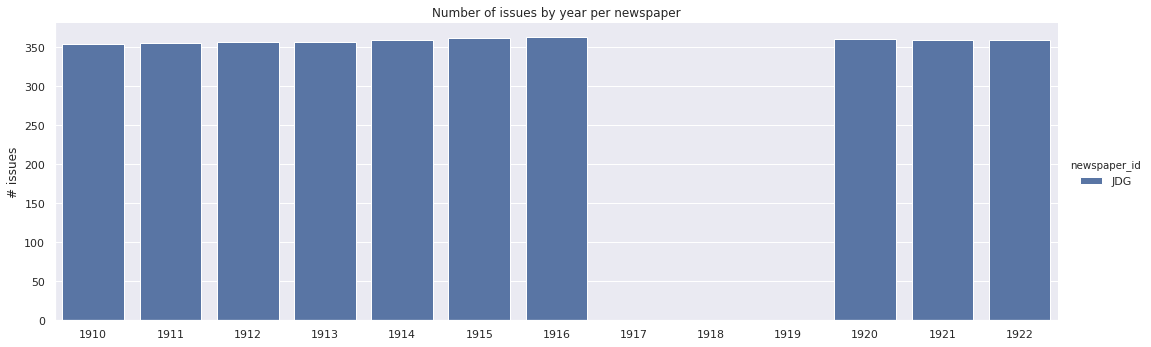

In [199]:
df = plt_freq_issues_time('year', np_ids=['JDG'], df=issues_df, start_date=1910, end_date=1922)

### 1.4 Group plotting

## 2. Licences